# AYA Project

Les donnees proviennent de plusieurs sources:
* Leucegene:
500 patients dont 80 AYA
donnees:  p-value analyse expression differentielle
non normalise 
analyse avec DeSeq2
* TGCA: ~ 200 adultes
* Target (https://ocg.cancer.gov/programs/target/projects/acute-myeloid-leukemia):
Les chercheurs de TARGET analysent les tumeurs de patients pediatriques, dont beaucoup ont fait une rechute, afin d'identifier des biomarqueurs en correlation avec de mauvais resultats cliniques et / ou de nouvelles approches therapeutiques pour traiter la LMA chez l'enfant. (200 patients)


But : Analyse expression differentielle, mettre en evidence des genes specifique aux Adolescents et jeunes Adultes (18-40 ans).



In [2]:
#if (!requireNamespace("BiocManager", quietly = TRUE))
#    install.packages("BiocManager")
#BiocManager::install("DESeq2", version = "3.8")
library("DESeq2")
#BiocManager::install("genefilter", version = "3.8")
library(genefilter)

In [4]:
library('plyr') #package pour table de comptage
library(magrittr)
library("varhandle")
#library(tidyr)

## Analyse expression differentielle a partir des read count

In [5]:
data_API = read.csv("/home/safia/Documents/AYA/Leucegene risk complete.txt",header = T,sep = "\t")
data_API<- data.frame(data_API[,-1], row.names=data_API[,1])

t_data_API = as.data.frame(t(data_API)) # inverse colonne ligne
colnames(t_data_API) <- gsub(" ","_",colnames(t_data_API)) # remplace les espaces dans le nom des colonnes
t_data_API <- head(t_data_API, -1) # supprimme la deriniere ligne data_type 

inf_40 = t_data_API[which(as.integer(t_data_API$Age_at_diagnosis)<=40),]
data_AYA = inf_40[which(as.integer(inf_40$Age_at_diagnosis)>=18),]
data_AYA = data_AYA[which(unfactor(data_AYA$`blasts_(%)`)>=70),]

In [6]:
adverse = row.names(data_AYA[which(unfactor(data_AYA$cytogenetic_risk)=="adverse cytogenetics"),])

intermediate = row.names(data_AYA[which(unfactor(data_AYA$cytogenetic_risk)=="intermediate cytogenetics"),])

favorable = row.names(data_AYA[which(unfactor(data_AYA$cytogenetic_risk)=="favorable cytogenetics"),])


In [7]:
read_count = read.table("/home/safia/Documents/AYA/genes_readcount.annotated.xls", header = T, sep="\t")

read_count<- data.frame(read_count[,-1], row.names=read_count[,1])
read_count = read_count[-c(1:4),]
read_count = read_count[,-c(582:585)]
names(read_count) = substring(names(read_count),8)


In [8]:
adverse = substring(adverse,2)
count_adverse = read_count[,adverse]
colnames(count_adverse) = paste("Adv", colnames(count_adverse), sep = "_")


intermediate = substring(intermediate,2)
count_intermediate = read_count[,intermediate]
colnames(count_intermediate) = paste("Int", colnames(count_intermediate), sep = "_")


favorable = substring(favorable,2)
count_favorable = read_count[,favorable]
colnames(count_favorable) = paste("Fav", colnames(count_favorable), sep = "_")


In [9]:
df = cbind(count_adverse,count_intermediate,count_favorable)
df_AI = cbind(count_adverse,count_intermediate)
df_AF = cbind(count_adverse,count_favorable)
df_IF = cbind(count_intermediate,count_favorable)

samples <- data.frame(groups = substr(colnames(df), 1, 3))
samples_AI <- data.frame(groups = substr(colnames(df_AI), 1, 3))
samples_AF <- data.frame(groups = substr(colnames(df_AF), 1, 3))
samples_IF <- data.frame(groups = substr(colnames(df_IF), 1, 3))

"base mean" (an average of the normalized mean counts per group), 
the log2 fold change between the groups, and the 
P-values (both "raw" and adjusted for multiple comparisons)

In [10]:
ds <- DESeqDataSetFromMatrix(countData=df, colData=samples, design=~groups)
colnames(ds) <- colnames(counts)
ds <-DESeq(ds)
res_AFI <- results(ds)
head(res_AFI)

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 2952 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


log2 fold change (MLE): groups Int vs Adv 
Wald test p-value: groups Int vs Adv 
DataFrame with 6 rows and 6 columns
                            baseMean      log2FoldChange             lfcSE
                           <numeric>           <numeric>         <numeric>
ENSG00000223972.5   6.31321696442759  -0.747374352667678 0.406016882592663
ENSG00000227232.5   197.475279636239   0.310064877937685 0.141528794094696
ENSG00000278267.1   15.9793273336559 -0.0558033816624807 0.218927219743635
ENSG00000243485.3   10.2307262228759   0.224398019298186 0.312267470022819
ENSG00000274890.1                  0                  NA                NA
ENSG00000237613.2 0.0944412291371156 -0.0511790486916849  2.89435466896233
                                 stat             pvalue              padj
                            <numeric>          <numeric>         <numeric>
ENSG00000223972.5   -1.84074698543381 0.0656586450210355 0.268148397593873
ENSG00000227232.5    2.19082540709152  0.028464429292212 0

In [11]:
library("tidyr")
library("dplyr")
library("ggplot2")



Attaching package: ‘tidyr’

The following object is masked from ‘package:magrittr’:

    extract

The following object is masked from ‘package:S4Vectors’:

    expand


Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:matrixStats’:

    count

The following object is masked from ‘package:Biobase’:

    combine

The following objects are masked from ‘package:GenomicRanges’:

    intersect, setdiff, union

The following object is masked from ‘package:GenomeInfoDb’:

    intersect

The following objects are masked from ‘package:IRanges’:

    collapse, desc, intersect, setdiff, slice, union

The following objects are masked from ‘package:S4Vectors’:

    first, intersect, rename, setdiff, setequal, union

The following objects are masked from ‘package:BiocGenerics’:

    combine, intersect, setdiff, union

The following objects a

In [12]:
colData(ds)

DataFrame with 90 rows and 3 columns
      groups        sizeFactor replaceable
    <factor>         <numeric>   <logical>
1        Adv  1.06766403264258        TRUE
2        Adv 0.720915997456176        TRUE
3        Adv  1.26893451340782        TRUE
4        Adv  1.26164904982795        TRUE
5        Adv 0.836164180153805        TRUE
...      ...               ...         ...
86       Fav  1.25607065504032        TRUE
87       Fav  1.19625850652073        TRUE
88       Fav 0.972424451531084        TRUE
89       Fav  1.12885709143182        TRUE
90       Fav 0.300363364902417        TRUE

In [13]:
res <- results(ds, tidy=TRUE) %>%
  arrange(padj, pvalue) %>%
  tbl_df()
head(res)

goi <- res$row[1:9]
stopifnot(all(goi %in% names(ds)))
goi

tcounts <- t(log2((counts(ds[goi, ], normalized=TRUE, replaced=FALSE)+.5))) %>%
  merge(colData(ds), ., by="row.names") %>%
  gather(gene, expression, (ncol(.)-length(goi)+1):ncol(.))

head(tcounts)


row                baseMean  log2FoldChange lfcSE     stat       pvalue      
1 ENSG00000076706.14 740.40448 -4.872056      0.4270116 -11.409659 3.741948e-30
2 ENSG00000140459.17  15.64857 -5.074597      0.4600894 -11.029588 2.751216e-28
3 ENSG00000180532.10  21.29039 -6.147194      0.5836160 -10.532944 6.089973e-26
4 ENSG00000140986.7   38.89760 -2.943494      0.2916910 -10.091138 6.046437e-24
5 ENSG00000261150.2   60.71967 -4.060512      0.4095001  -9.915778 3.554753e-23
6 ENSG00000104140.6   42.68147 -3.966966      0.4096788  -9.683113 3.557172e-22
  padj        
1 1.406186e-25
2 5.169398e-24
3 7.628503e-22
4 5.680476e-20
5 2.671681e-19
6 2.227916e-18

[1] "ENSG00000076706.14" "ENSG00000140459.17" "ENSG00000180532.10"
[4] "ENSG00000140986.7"  "ENSG00000261150.2"  "ENSG00000104140.6" 
[7] "ENSG00000187017.14" "ENSG00000187513.8"  "ENSG00000130201.7"

Row.names groups sizeFactor replaceable gene               expression
1 1         Adv    1.0351506  TRUE        ENSG00000076706.14 3.344890  
2 10        Adv    1.0978496  TRUE        ENSG00000076706.14 6.600692  
3 100       Int    0.7671423  TRUE        ENSG00000076706.14 3.449999  
4 101       Int    0.7635215  TRUE        ENSG00000076706.14 3.456513  
5 102       Int    0.3568785  TRUE        ENSG00000076706.14 7.191877  
6 103       Int    0.9986346  TRUE        ENSG00000076706.14 5.944470

In [14]:
#if (!requireNamespace("BiocManager", quietly = TRUE))
 #   install.packages("BiocManager")
#BiocManager::install("biomaRt", version = "3.8")
library('biomaRt')

In [16]:
mart <- useDataset("hsapiens_gene_ensembl", useMart("ensembl"))
genes <- tcounts$gene
genes <- gsub("\\..*","",genes )
G_list <- getBM(filters= "ensembl_gene_id", attributes= c("ensembl_gene_id",
"hgnc_symbol"),values=genes,mart= mart)
for (i in 1:length(genes)){
    if (genes[i] %in% G_list$ensembl_gene_id){
        tcounts$gene[i] = G_list[G_list$ensembl_gene_id == genes[i],]$hgnc_symbol
    }
}
head(tcounts)

Row.names groups sizeFactor replaceable gene expression
1 1         Adv    1.0351506  TRUE        MCAM 3.344890  
2 10        Adv    1.0978496  TRUE        MCAM 6.600692  
3 100       Int    0.7671423  TRUE        MCAM 3.449999  
4 101       Int    0.7635215  TRUE        MCAM 3.456513  
5 102       Int    0.3568785  TRUE        MCAM 7.191877  
6 103       Int    0.9986346  TRUE        MCAM 5.944470

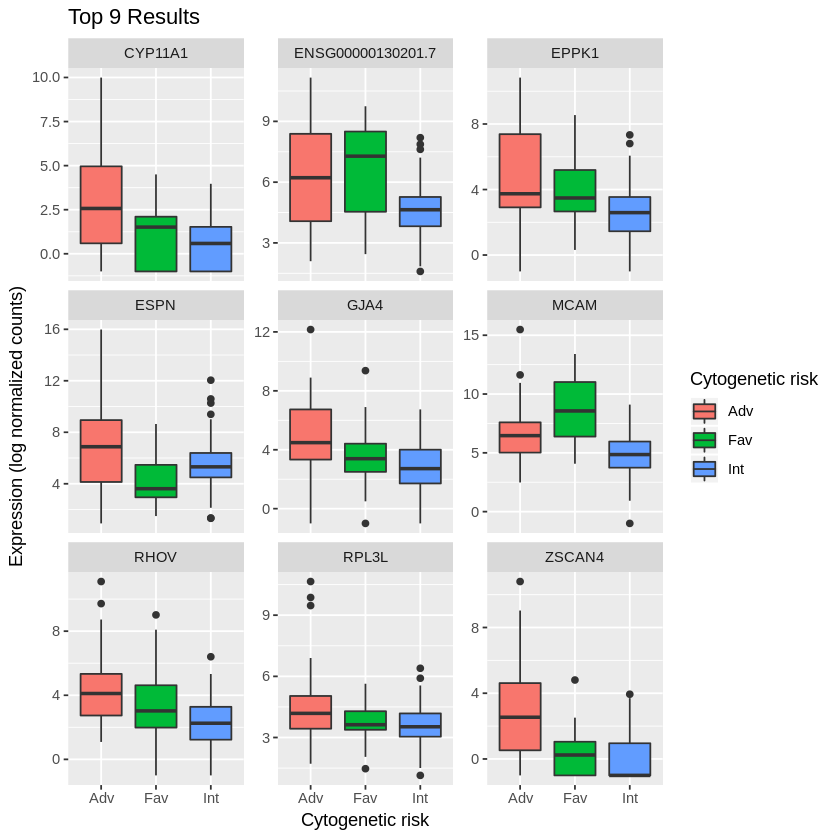

In [21]:
ggplot(tcounts, aes(groups, expression, fill=groups)) + 
  geom_boxplot() + 
  facet_wrap(~gene, scales="free_y") + 
  labs(x="Cytogenetic risk", 
       y="Expression (log normalized counts)", 
       fill="Cytogenetic risk", 
       title="Top 9 Results")


----

### DE Adverse vs Intermediate

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 4236 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


row                baseMean  log2FoldChange lfcSE     stat       pvalue      
1 ENSG00000140459.17  18.71741 -5.076434      0.4756450 -10.672737 1.365446e-26
2 ENSG00000104140.6   41.85778 -3.969161      0.3886249 -10.213345 1.728029e-24
3 ENSG00000261150.2   66.03076 -4.063376      0.4157089  -9.774570 1.447706e-22
4 ENSG00000187513.8   71.18319 -3.872530      0.4129465  -9.377801 6.736310e-21
5 ENSG00000130201.7  116.15454 -3.067183      0.3275012  -9.365409 7.575622e-21
6 ENSG00000141756.18 150.73249 -3.402520      0.3638267  -9.352034 8.597846e-21
  padj        
1 5.104584e-22
2 3.230032e-20
3 1.804035e-18
4 5.357031e-17
5 5.357031e-17
6 5.357031e-17

Row.names groups sizeFactor replaceable gene               expression
1 1         Adv    1.0571421  TRUE        ENSG00000140459.17 -1.000000 
2 10        Adv    1.1239483  TRUE        ENSG00000140459.17  6.745056 
3 100       Int    0.7898805  TRUE        ENSG00000140459.17  0.820497 
4 101       Int    0.7825816  TRUE        ENSG00000140459.17 -1.000000 
5 102       Int    0.3642953  TRUE        ENSG00000140459.17  2.582568 
6 103       Int    1.0217101  TRUE        ENSG00000140459.17  1.297193

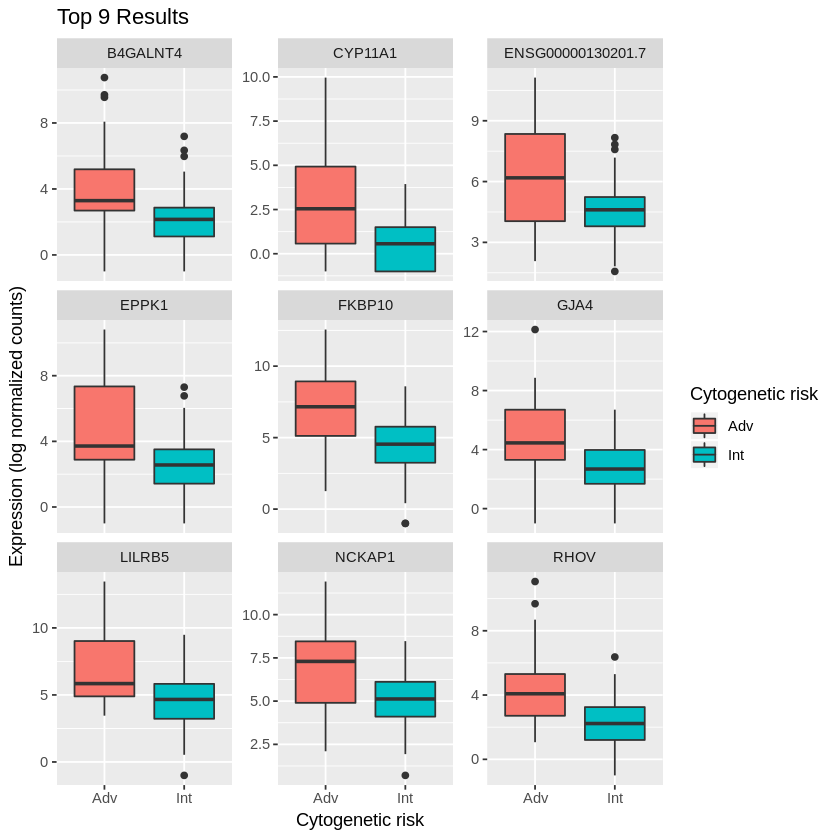

In [22]:
ds_AI <- DESeqDataSetFromMatrix(countData=df_AI, colData=samples_AI, design=~groups)
colnames(ds_AI) <- colnames(counts)
ds_AI <-DESeq(ds_AI)
res_AI <- results(ds_AI)


res <- results(ds_AI, tidy=TRUE) %>%
  arrange(padj, pvalue) %>%
  tbl_df()
head(res)

goi <- res$row[1:9]
stopifnot(all(goi %in% names(ds_AI)))


tcounts <- t(log2((counts(ds_AI[goi, ], normalized=TRUE, replaced=FALSE)+.5))) %>%
  merge(colData(ds_AI), ., by="row.names") %>%
  gather(gene, expression, (ncol(.)-length(goi)+1):ncol(.))

head(tcounts)


mart <- useDataset("hsapiens_gene_ensembl", useMart("ensembl"))
genes <- tcounts$gene
genes <- gsub("\\..*","",genes )
G_list <- getBM(filters= "ensembl_gene_id", attributes= c("ensembl_gene_id",
"hgnc_symbol"),values=genes,mart= mart)
for (i in 1:length(genes)){
    if (genes[i] %in% G_list$ensembl_gene_id){
        tcounts$gene[i] = G_list[G_list$ensembl_gene_id == genes[i],]$hgnc_symbol
    }
}

ggplot(tcounts, aes(groups, expression, fill=groups)) + 
  geom_boxplot() + 
  facet_wrap(~gene, scales="free_y") + 
  labs(x="Cytogenetic risk", 
       y="Expression (log normalized counts)", 
       fill="Cytogenetic risk", 
       title="Top 9 Results")



----

### DE Adverse vs Favorable

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 3765 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


log2 fold change (MLE): groups Fav vs Adv 
Wald test p-value: groups Fav vs Adv 
DataFrame with 6 rows and 6 columns
                           baseMean     log2FoldChange             lfcSE
                          <numeric>          <numeric>         <numeric>
ENSG00000223972.5  9.78094819238956  0.145290776896913 0.406698119511516
ENSG00000227232.5  230.290136212092 -0.128597291013012 0.147938357025871
ENSG00000278267.1  22.1680832864559  0.543995527900806 0.191191787354175
ENSG00000243485.3    10.10069480894  0.730570362239652 0.293433138149101
ENSG00000274890.1                 0                 NA                NA
ENSG00000237613.2 0.130265302479445 0.0695717343119896  1.86910911389735
                                stat              pvalue               padj
                           <numeric>           <numeric>          <numeric>
ENSG00000223972.5  0.357244771801308   0.720908571226536  0.842550267412853
ENSG00000227232.5 -0.869262668575693   0.384703476849036  0.58246200946

row                baseMean  log2FoldChange lfcSE     stat      pvalue      
1 ENSG00000168497.4  1575.7250 -6.207688      0.3484677 -17.81424 5.479476e-71
2 ENSG00000139117.13 1559.3771 -5.429718      0.3713834 -14.62025 2.086308e-48
3 ENSG00000229425.2   943.7146 -7.923437      0.5548102 -14.28135 2.860226e-46
4 ENSG00000265190.6   498.8495  5.693417      0.4156409  13.69792 1.044675e-42
5 ENSG00000106006.6   250.4356 -8.073627      0.5965826 -13.53313 9.969299e-42
6 ENSG00000188580.13  110.4437 -6.262484      0.4733336 -13.23059 5.842408e-40
  padj        
1 2.060119e-66
2 3.921946e-44
3 3.584531e-42
4 9.819161e-39
5 7.496315e-38
6 3.660950e-36

Row.names groups sizeFactor replaceable gene              expression
1 1         Adv    0.9972751  TRUE        ENSG00000168497.4  6.916810 
2 10        Adv    1.0477203  TRUE        ENSG00000168497.4  9.880418 
3 11        Adv    1.0995680  TRUE        ENSG00000168497.4 13.034482 
4 12        Adv    1.0003808  TRUE        ENSG00000168497.4  8.402464 
5 13        Adv    1.0619069  TRUE        ENSG00000168497.4 10.340164 
6 14        Adv    1.0057511  TRUE        ENSG00000168497.4  9.691304

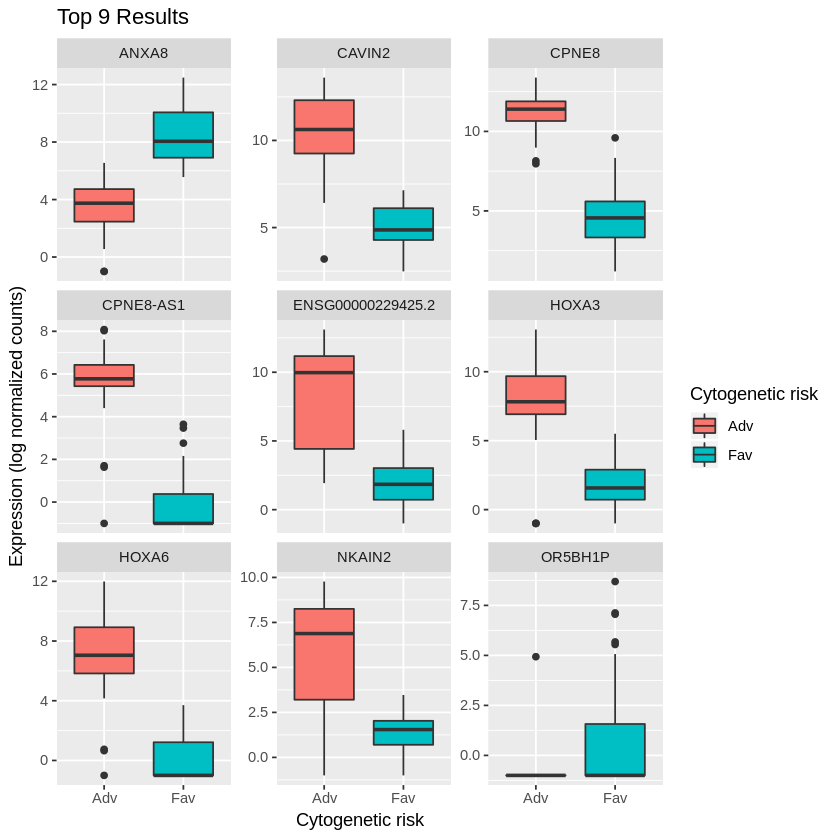

In [23]:
ds_AF<- DESeqDataSetFromMatrix(countData=df_AF, colData=samples_AF, design=~groups)
colnames(ds_AF) <- colnames(counts)
ds_AF <-DESeq(ds_AF)
res_AF <- results(ds_AF)
head(res_AF)

res <- results(ds_AF, tidy=TRUE) %>%
  arrange(padj, pvalue) %>%
  tbl_df()
head(res)

goi <- res$row[1:9]
stopifnot(all(goi %in% names(ds_AF)))


tcounts <- t(log2((counts(ds_AF[goi, ], normalized=TRUE, replaced=FALSE)+.5))) %>%
  merge(colData(ds_AF), ., by="row.names") %>%
  gather(gene, expression, (ncol(.)-length(goi)+1):ncol(.))

head(tcounts)


mart <- useDataset("hsapiens_gene_ensembl", useMart("ensembl"))
genes <- tcounts$gene
genes <- gsub("\\..*","",genes )
G_list <- getBM(filters= "ensembl_gene_id", attributes= c("ensembl_gene_id",
"hgnc_symbol"),values=genes,mart= mart)

for (i in 1:length(genes)){
    if (genes[i] %in% G_list$ensembl_gene_id){
        a = G_list[G_list$ensembl_gene_id == genes[i],]$hgnc_symbol[1]
        if (a != ""){
            tcounts$gene[i] = a
        }
    }
}

ggplot(tcounts, aes(groups, expression, fill=groups)) + 
  geom_boxplot() + 
  facet_wrap(~gene, scales="free_y") + 
  labs(x="Cytogenetic risk", 
       y="Expression (log normalized counts)", 
       fill="Cytogenetic risk", 
       title="Top 9 Results")


----

### DE Intermediate vs Favorable

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 2831 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


row                baseMean   log2FoldChange lfcSE     stat     pvalue       
1 ENSG00000277867.1    40.98106 24.923725      1.0658329 23.38427 6.178273e-121
2 ENSG00000106006.6   771.98901  9.243961      0.4269986 21.64869 6.252986e-104
3 ENSG00000105997.22 1051.20102  7.742617      0.3603073 21.48892 1.976396e-102
4 ENSG00000254369.6   605.89029  8.984685      0.4382025 20.50350  2.003583e-93
5 ENSG00000253552.7   429.02586  6.343401      0.3365287 18.84951  2.965910e-79
6 ENSG00000106004.4  3402.40741  7.197681      0.3897439 18.46772  3.756075e-76
  padj         
1 2.374867e-116
2  1.201793e-99
3  2.532357e-98
4  1.925393e-89
5  2.280132e-75
6  2.406329e-72

Row.names groups sizeFactor replaceable gene              expression
1 1         Int    0.9349737  TRUE        ENSG00000277867.1  0.6503499
2 10        Int    0.9849938  TRUE        ENSG00000277867.1 -1.0000000
3 100       Fav    1.2766175  TRUE        ENSG00000277867.1 -1.0000000
4 101       Fav    1.6994194  TRUE        ENSG00000277867.1 -1.0000000
5 102       Fav    1.3082725  TRUE        ENSG00000277867.1 -1.0000000
6 103       Fav    1.3181788  TRUE        ENSG00000277867.1 -1.0000000

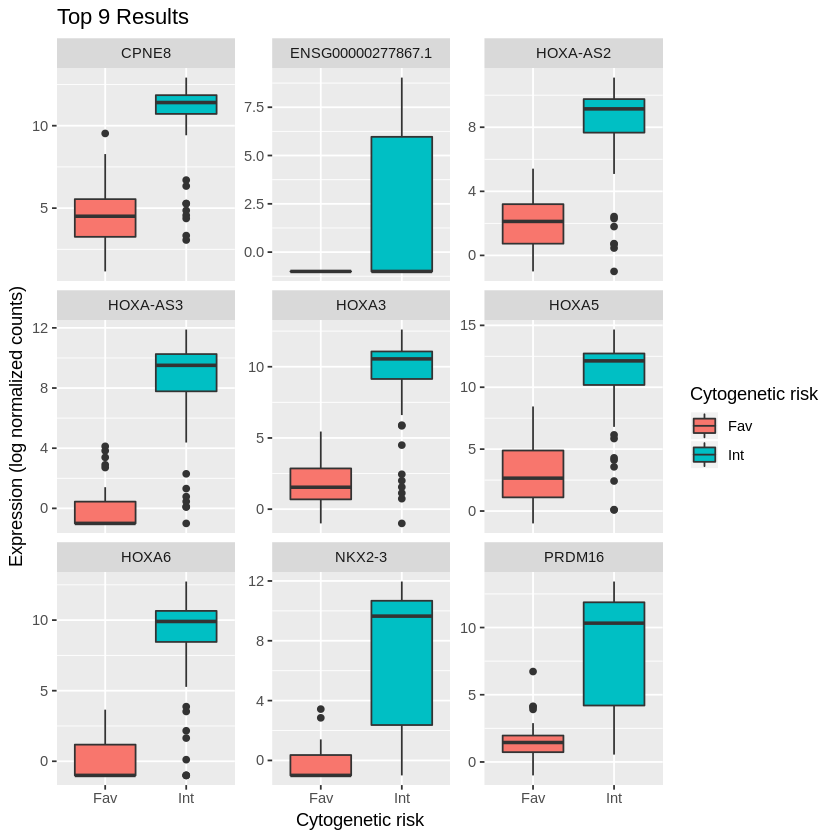

In [24]:
ds_IF <- DESeqDataSetFromMatrix(countData=df_IF, colData=samples_IF, design=~groups)
colnames(ds_IF) <- colnames(counts)
ds_IF <-DESeq(ds_IF)
res_IF <- results(ds_IF)


res <- results(ds_IF, tidy=TRUE) %>%
  arrange(padj, pvalue) %>%
  tbl_df()
head(res)

goi <- res$row[1:9]
stopifnot(all(goi %in% names(ds_IF)))


tcounts <- t(log2((counts(ds_IF[goi, ], normalized=TRUE, replaced=FALSE)+.5))) %>%
  merge(colData(ds_IF), ., by="row.names") %>%
  gather(gene, expression, (ncol(.)-length(goi)+1):ncol(.))

head(tcounts)


mart <- useDataset("hsapiens_gene_ensembl", useMart("ensembl"))
genes <- tcounts$gene
genes <- gsub("\\..*","",genes )
G_list <- getBM(filters= "ensembl_gene_id", attributes= c("ensembl_gene_id",
"hgnc_symbol"),values=genes,mart= mart)
for (i in 1:length(genes)){
    if (genes[i] %in% G_list$ensembl_gene_id){
        a = G_list[G_list$ensembl_gene_id == genes[i],]$hgnc_symbol
        if (a != ""){
            tcounts$gene[i] = a
        }
         
    }
}

ggplot(tcounts, aes(groups, expression, fill=groups)) + 
  geom_boxplot() + 
  facet_wrap(~gene, scales="free_y") + 
  labs(x="Cytogenetic risk", 
       y="Expression (log normalized counts)", 
       fill="Cytogenetic risk", 
       title="Top 9 Results")


----

In [25]:
write.table(res_AFI, "res_DE_AFI_selected_noblast.xls", sep="\t") 
write.table(res_AI, "res_DE_AI_selected_noblast.xls", sep="\t") 
write.table(res_AF, "res_DE_AF_selected_noblast.xls", sep="\t") 
write.table(res_IF, "res_DE_FI_selected_noblast.xls", sep="\t") 


#### Diagramm Venn genes significatif

In [26]:
THRESHOLD <- 0.05
res_AI.sig <- subset(res_AI, padj<THRESHOLD) 
res_AF.sig <- subset(res_AF, padj<THRESHOLD)  
res_FI.sig <- subset(res_IF, padj<THRESHOLD) 
res_AFI.sig <- subset(res_AFI, padj<THRESHOLD)



In [27]:
length(rownames(res_AI.sig))
length(rownames(res_AF.sig))
length(rownames(res_FI.sig))
length(rownames(res_AFI.sig))

[1] 6943

[1] 8158

[1] 12648

[1] 7387

Loading required package: grid
Loading required package: futile.logger


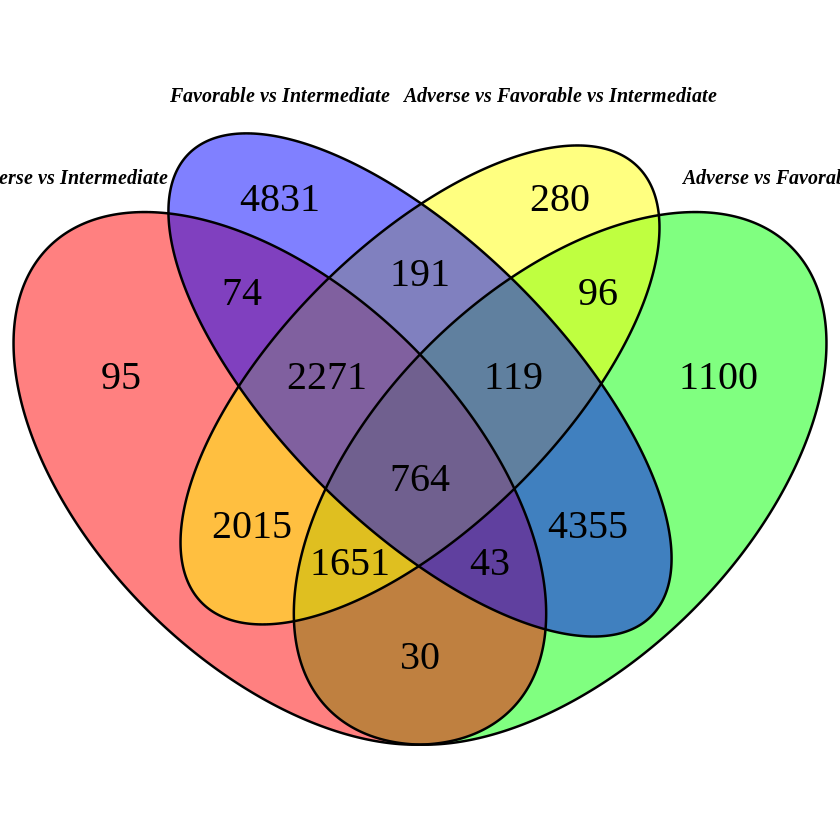

In [28]:
library(VennDiagram)

venn.plot <- venn.diagram(list(rownames(res_AI.sig), rownames(res_AF.sig), rownames(res_FI.sig), rownames(res_AFI.sig)), NULL, fill=c("red", "green","blue","yellow"), alpha=c(0.5,0.5,0.5,0.5), cex = 2, cat.fontface=4, category.names=c("Adverse vs Intermediate", "Adverse vs Favorable","Favorable vs Intermediate","Adverse vs Favorable vs Intermediate"))
grid.draw(venn.plot)
